In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#the data is already sorted into training and test data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [5]:
test_data.shape

(10000, 28, 28)

In [6]:
#check the shape of the data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

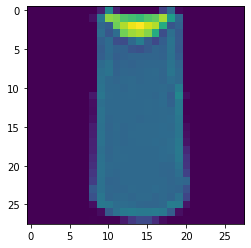

In [8]:
#plot sample of the data
import matplotlib.pyplot as plt
plt.imshow(train_data[2])


In [9]:
# check the sample label
train_labels[2]

0

In [10]:
#creating a list of classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#check how many class are there 
len(class_names)

10

In [11]:
class_names[train_labels[2]]

'T-shirt/top'

Text(0.5, 1.0, 'T-shirt/top')

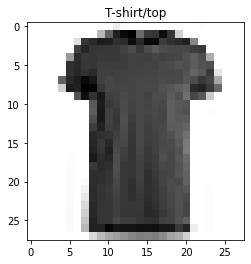

In [15]:
#plot an image and the label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

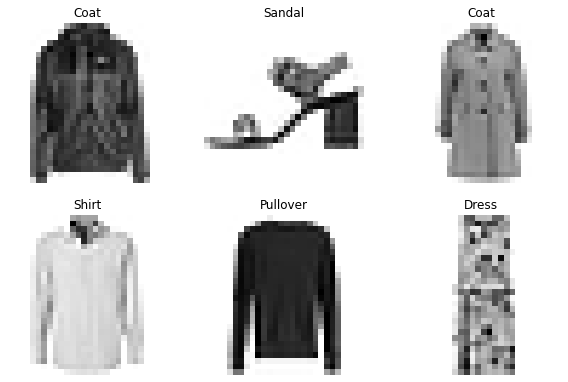

In [19]:
# plot random images of the sample and the titles
import random
plt.figure(figsize=(10,10))
for i in range(6):
    ax = plt.subplot(3,3,i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis('off')

In [30]:
# set the random see
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(10, activation="softmax") ])

#complie the mode
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics="accuracy")

#fit the model
non_normalized_history  = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 - val_accuracy:

### the accuracy is bad thus we need to check and correct our training inorder to better our accuracy

In [23]:
# check the min and max value of the training data
train_data.min(), train_data.max()

(0, 255)

### we need to get the values between 0 and 1. we do this by dividing with the max value. which in this case is 255.0

In [24]:
# divide the train and the test images by max value which 255.0
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

In [25]:
#check the new min and max value of the normalized data
train_data_normalized.min(), train_data_normalized.max()

(0.0, 1.0)

### we train a new model on the normlized data to see if it will perform better

In [76]:
# set the random seed
tf.random.set_seed(42)

#Create the model
model_normalized = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation= "relu"),
    tf.keras.layers.Dense(5, activation= "relu"),
    tf.keras.layers.Dense(10, activation="softmax")  
])

#compile the model
model_normalized.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics="accuracy")

#fit the model
norm_history = model_normalized.fit(train_data_normalized, train_labels, epochs=20, validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9882 - accuracy: 0.6417 - val_loss: 0.6626 - val_accuracy: 0.7882
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5850 - accuracy: 0.8025 - val_loss: 0.5946 - val_accuracy: 0.8031
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5309 - accuracy: 0.8174 - val_loss: 0.5669 - val_accuracy: 0.8041
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5086 - accuracy: 0.8232 - val_loss: 0.5322 - val_accuracy: 0.8151
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4950 - accuracy: 0.8270 - val_loss: 0.5401 - val_accuracy: 0.8099
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4850 - accuracy: 0.8291 - val_loss: 0.5420 - val_accuracy: 0.8085
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4785 - accuracy: 0.8321 - val_loss: 0.5405 - val_accuracy:

Text(0.5, 1.0, 'Normalized data')

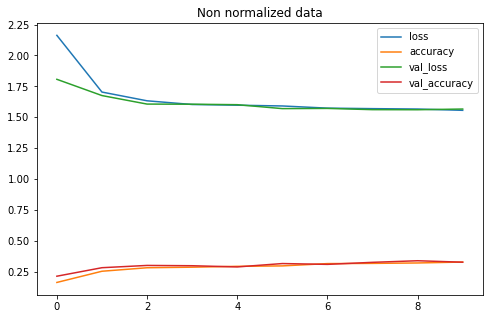

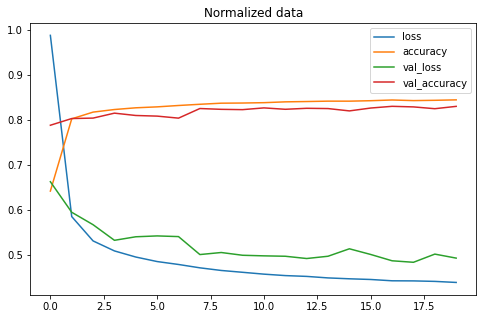

In [77]:
import pandas as pd
# Plot the non-normalized data loss curves
pd.DataFrame(non_normalized_history.history).plot(figsize=(8,5))
plt.title("Non normalized data")

# plot normlized data
pd.DataFrame(norm_history.history).plot(figsize=(8,5))
plt.title("Normalized data")


In [78]:
# check the summary of the model
model_normalized.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 5)                 3925      
                                                                 
 dense_45 (Dense)            (None, 5)                 30        
                                                                 
 dense_46 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Mack a prediction on the normalized data
predictions = model_normalized.predict(test_data_normalized)
predictions[0]

313/313 [==============================] - 0s 1ms/step


array([1.7318284e-08, 1.8353245e-17, 7.0590661e-10, 7.7898239e-09,
       8.6841578e-10, 6.7974821e-02, 5.1382450e-08, 6.7318790e-02,
       5.3309795e-04, 8.6417323e-01], dtype=float32)

(<matplotlib.image.AxesImage at 0x1e92de13550>, Text(0.5, 1.0, 'Pullover'))

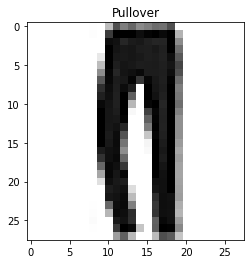

In [80]:
# see the prediction of the first image
predictions[17].argmax(), class_names[predictions[17].argmax()],
plt.imshow(test_data_normalized[predictions[17].argmax()], cmap=plt.cm.binary), plt.title(class_names[predictions[17].argmax()])

(<matplotlib.image.AxesImage at 0x1e92de5f070>, Text(0.5, 1.0, 'Ankle boot'))

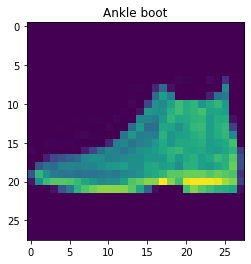

In [81]:
#check what image is on the first position
plt.imshow(test_data_normalized[0]), plt.title(class_names[test_labels[0]])

In [82]:
# create a confusion matrix using sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predictions.argmax(axis=1))

array([[769,   6,  18,  84,   4,   2, 101,   0,  16,   0],
       [  2, 948,  10,  31,   6,   0,   1,   0,   2,   0],
       [ 18,   4, 693,  10, 185,   0,  83,   0,   7,   0],
       [ 38,  11,  11, 832,  57,   0,  42,   0,   9,   0],
       [  0,   1, 102,  16, 807,   1,  66,   0,   7,   0],
       [  0,   0,   0,   1,   0, 898,   0,  57,   6,  38],
       [147,   2, 107,  47, 134,   1, 526,   0,  36,   0],
       [  0,   0,   0,   0,   0,  23,   0, 943,   0,  34],
       [  2,   0,   9,   9,   6,   6,  10,   4, 952,   2],
       [  0,   0,   0,   0,   0,  18,   0,  46,   2, 934]], dtype=int64)

In [83]:
# method to plot the confusion matrix
def make_confusion_matrix(model, data, labels):
    predictions = model.predict(data)
    return confusion_matrix(labels, predictions.argmax(axis=1))

In [84]:
# implement the confusion matrix method
model_normalized_confusion_matrix_array =  make_confusion_matrix(model_normalized, test_data_normalized, test_labels)
model_normalized_confusion_matrix_array

313/313 [==============================] - 1s 2ms/step


array([[769,   6,  18,  84,   4,   2, 101,   0,  16,   0],
       [  2, 948,  10,  31,   6,   0,   1,   0,   2,   0],
       [ 18,   4, 693,  10, 185,   0,  83,   0,   7,   0],
       [ 38,  11,  11, 832,  57,   0,  42,   0,   9,   0],
       [  0,   1, 102,  16, 807,   1,  66,   0,   7,   0],
       [  0,   0,   0,   1,   0, 898,   0,  57,   6,  38],
       [147,   2, 107,  47, 134,   1, 526,   0,  36,   0],
       [  0,   0,   0,   0,   0,  23,   0, 943,   0,  34],
       [  2,   0,   9,   9,   6,   6,  10,   4, 952,   2],
       [  0,   0,   0,   0,   0,  18,   0,  46,   2, 934]], dtype=int64)

## Confusion matrix heatmap

In [85]:
import seaborn as sns
confusion_matrix_dataframe = pd.DataFrame(model_normalized_confusion_matrix_array, index=class_names, columns=class_names)
confusion_matrix_dataframe

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,769,6,18,84,4,2,101,0,16,0
Trouser,2,948,10,31,6,0,1,0,2,0
Pullover,18,4,693,10,185,0,83,0,7,0
Dress,38,11,11,832,57,0,42,0,9,0
Coat,0,1,102,16,807,1,66,0,7,0
Sandal,0,0,0,1,0,898,0,57,6,38
Shirt,147,2,107,47,134,1,526,0,36,0
Sneaker,0,0,0,0,0,23,0,943,0,34
Bag,2,0,9,9,6,6,10,4,952,2
Ankle boot,0,0,0,0,0,18,0,46,2,934


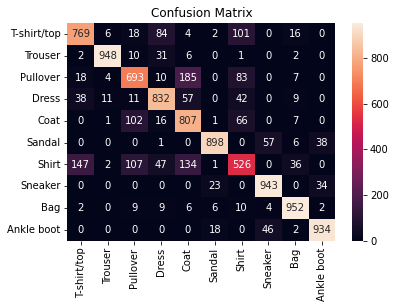

In [86]:
sns.heatmap(confusion_matrix_dataframe, annot=True, fmt="d")
plt.Figure(figsize=(20,20))
plt.title("Confusion Matrix")
plt.show()

In [94]:
# Save a model
model_normalized.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model\assets


In [95]:
#load the model and evaluate it
loaded_model = tf.keras.models.load_model("saved_trained_model")
loaded_model.evaluate(test_data_normalized, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4926 - accuracy: 0.8302


[0.49260953068733215, 0.8302000164985657]

In [96]:
# evaluate the un saved model
model_normalized.evaluate(test_data_normalized, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8302


[0.49260953068733215, 0.8302000164985657]

In [97]:
#Mack a prediction on the normalized data
predictions_loaded_model = loaded_model.predict(test_data_normalized)
predictions_loaded_model[0]

313/313 [==============================] - 1s 2ms/step


array([1.7318284e-08, 1.8353245e-17, 7.0590661e-10, 7.7898239e-09,
       8.6841578e-10, 6.7974821e-02, 5.1382450e-08, 6.7318790e-02,
       5.3309795e-04, 8.6417323e-01], dtype=float32)

(<matplotlib.image.AxesImage at 0x1e92d519870>, Text(0.5, 1.0, 'Pullover'))

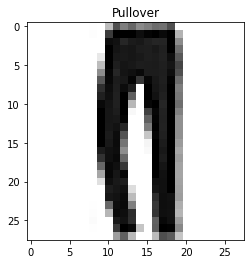

In [98]:
# see the prediction of the first image
predictions_loaded_model[17].argmax(), class_names[predictions_loaded_model[17].argmax()],
plt.imshow(test_data_normalized[predictions_loaded_model[17].argmax()], cmap=plt.cm.binary), plt.title(class_names[predictions_loaded_model[17].argmax()])